**MODEL TARGET:** The model is based on Neural Networks and has feature engineering capabilities on Cleaned data.csv to learn the symptomatic dependencies of novel Corona virus.The model after deploy can test a patient has covid or not by taking the quiz in the application interface.

In [2]:
#importing essential libraries for the model purpose.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , Normalizer

In [4]:
#loading csv file from drive
df=pd.read_csv("/content/drive/My Drive/564100_1024825_bundle_archive/Cleaned-Data.csv")

In [5]:
#checking the data provided
df.head(10)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,China
5,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,China
6,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,China
7,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,China
8,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,China
9,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,China


In [6]:
#display the shape of the data 
display("Shape of dataset")
print("Rows:",df.shape[0],"\nColumns:",df.shape[1])

'Shape of dataset'

Rows: 316800 
Columns: 27


In [7]:
#droping the unnecessary datas from the dataset
df.drop(columns="Country",inplace=True)

In [8]:
#checking if there is any null values or not in the dataset
display("NULL Values", df.isnull().sum())

'NULL Values'

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
dtype: int64

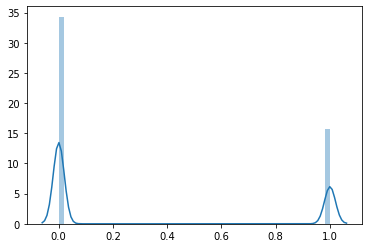

In [9]:
#checking the distribution of the data
sns.distplot(df)

In [10]:
#group the dataset according to the severity of the case :::;
severity_columns = df.filter(like='Severity_').columns
df['Severity_None'].replace({1:'None',0:'No'},inplace =True)
df['Severity_Mild'].replace({1:'Mild',0:'No'},inplace =True)
df['Severity_Moderate'].replace({1:'Moderate',0:'No'},inplace =True)
df['Severity_Severe'].replace({1:'Severe',0:'No'},inplace =True)
df['Condition']=df[severity_columns].values.tolist()
def removing(list1):
    list1 = set(list1) 
    list1.discard("No")
    a = ''.join(list1)
    return a
df['Condition'] = df['Condition'].apply(removing)
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Condition
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,Mild,No,No,No,0,0,1,Mild
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,Mild,No,No,No,0,1,0,Mild
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,Mild,No,No,No,1,0,0,Mild
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,No,Moderate,No,No,0,0,1,Moderate
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,No,Moderate,No,No,0,1,0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,No,No,No,Severe,0,1,0,Severe
316796,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,No,No,No,Severe,1,0,0,Severe
316797,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,No,No,None,No,0,0,1,None
316798,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,No,No,None,No,0,1,0,None


In [11]:
#determining the disease predictor value by considering only the symptoms
df['Score'] = df.iloc[:,:5].sum(axis=1) + df.iloc[:,6:10].sum(axis=1)
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Condition,Score
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,Mild,No,No,No,0,0,1,Mild,9
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,Mild,No,No,No,0,1,0,Mild,9
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,Mild,No,No,No,1,0,0,Mild,9
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,No,Moderate,No,No,0,0,1,Moderate,9
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,No,Moderate,No,No,0,1,0,Moderate,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,No,No,No,Severe,0,1,0,Severe,0
316796,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,No,No,No,Severe,1,0,0,Severe,0
316797,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,No,No,None,No,0,0,1,None,0
316798,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,No,No,None,No,0,1,0,None,0


In [12]:
#determining the severe condiitions by value
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Condition'] = le.fit_transform(df['Condition'])

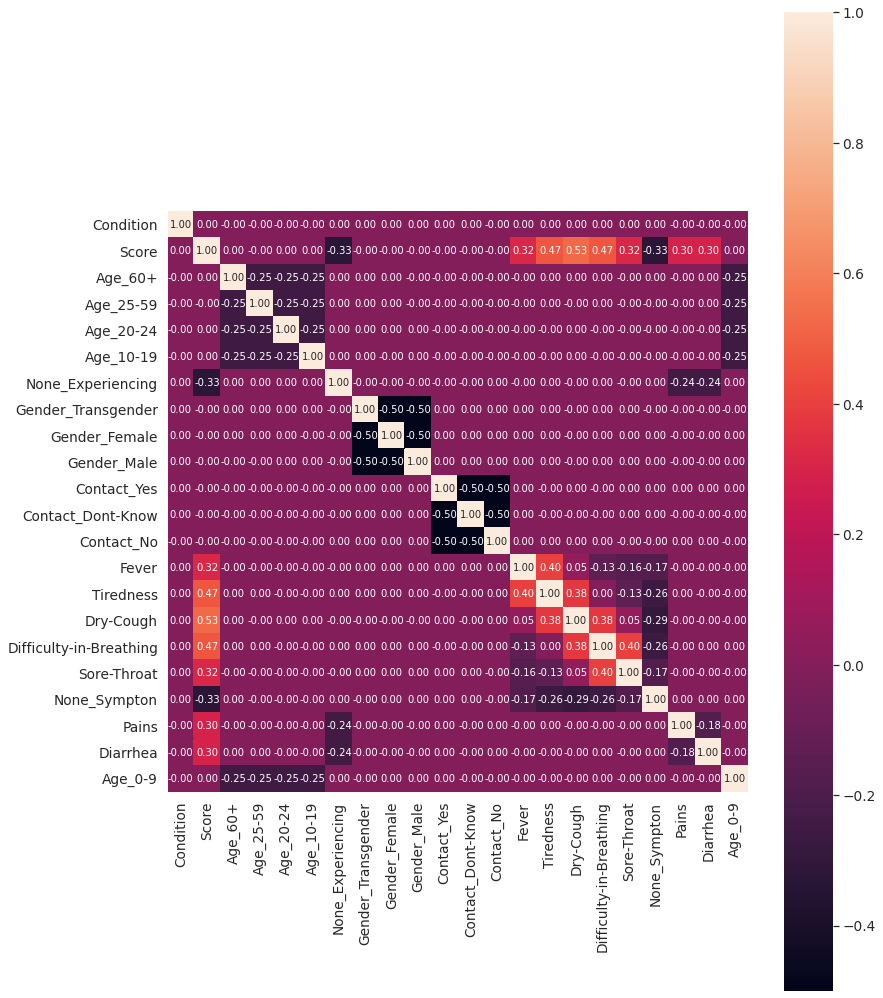

In [13]:
#show the correlation and heat map for the columns
from pylab import rcParams
rcParams['figure.figsize'] = 13, 18
corrmat = df.corr()
k = 22
cols = corrmat.nlargest(k, 'Condition')['Condition'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [84]:
X= df.drop(['Condition'],axis=1)
y= df['Condition']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [85]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
# use the model to make predictions with the test data
y_pred = model.predict(X_test)

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.24203493265993267

In [89]:
from sklearn.naive_bayes import MultinomialNB
#using multinomial naive bayes algorithm to predict the test accuracy
mb = MultinomialNB()
mb.fit(X_train, y_train)
y_pred_mb = mb.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_mb)

0.2421506734006734

In [90]:
import pickle

In [91]:
pickle.dump(mb,open('covid_model.pkl','wb'))

In [92]:
pickle.load(open('covid_model.pkl','rb'))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)